# Lab: Week #10 | Using Quantum Hardware
---

### **Description**:  
In this week's lab, we will see how to use real quantum hardware from IBM to run our circuits.

<br>

### **Cheat Sheets**:  

[Updated Qiskit Cheat Sheet](https://docs.google.com/document/d/1GArKBUksi4pMgcEBc4OpvWp2KREPpnQvq0AgyijJnkI/edit?usp=share_link)

[Loops and Conditionals Cheat Sheet](https://docs.google.com/document/d/1WKvv22SC7pA0TCqCJnxgZOf2tHjvTotaHYEtOx2FNkI/edit?usp=share_link)


---

## **Part 0: Importing from Qiskit**
---

Run the cell directly below before doing anything else. This will import all of the functions that we will use today.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

## **Part 1: Backends**
---

In this section, we will explore the concept of "backends" in Qiskit and what we can do with them.

#### **Exercise #1** 

**Together**, let's see what information we can get about a specific backend from IQX: ibm_oslo.

In [2]:
provider.get_backend('ibm_oslo')

<IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>

#### **Exercise #2** 

**Together**, let's look at a list of all available backends and see how long the lines are to use them.

In [3]:
backends = provider.backends()

for i in range(len(backends)):
    print("Backend " + str(i) + ": " + str(backends[i]))
    print("Pending Jobs: " + str(backends[i].status().pending_jobs))
    print()

Backend 0: ibmq_qasm_simulator
Pending Jobs: 5

Backend 1: ibmq_lima
Pending Jobs: 149

Backend 2: ibmq_belem
Pending Jobs: 13

Backend 3: ibmq_quito
Pending Jobs: 0

Backend 4: simulator_statevector
Pending Jobs: 5

Backend 5: simulator_mps
Pending Jobs: 5

Backend 6: simulator_extended_stabilizer
Pending Jobs: 5

Backend 7: simulator_stabilizer
Pending Jobs: 5

Backend 8: ibmq_manila
Pending Jobs: 192

Backend 9: ibm_nairobi
Pending Jobs: 39

Backend 10: ibm_oslo
Pending Jobs: 50



## **Part 2: Running on Quantum Hardware**
---

In this section, we will run our circuits on real quantum hardware!!

#### **Exercise #1** 

Let's jump right in! Specifically:
1. Run the first cell to create and draw the circuit we're going to run today: **creating entanglement**.

2. Run the second cell to simulate this so we have something to compare our measured results to.

3. Run the third cell to send the job off to execute and see what it's status is initially.

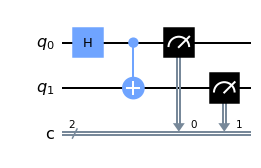

In [4]:
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0, 1)

qc.measure([0, 1], [0, 1])

qc.draw()

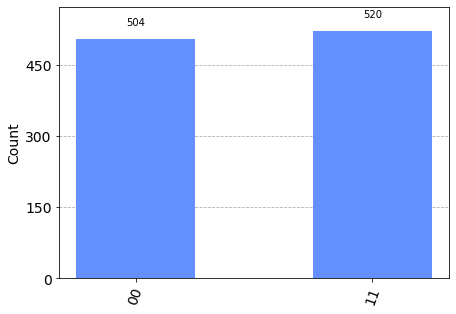

In [5]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024)

results = job.result()
plot_histogram(results.get_counts(qc))

In [6]:
backend = backends[1]
job = execute(qc, backend = backend, shots = 1024)

job.status()

<JobStatus.QUEUED: 'job is queued'>

---

**Back to the slides**


---

#### **Exercise #2** 

While we wait for this job to finish, let's see what this was transpiled into for this specific backend, with and without `idle_wires = False`.

In [ ]:
tc = transpile(qc, backend = backend)
tc.draw()

In [ ]:
# Create and draw transpiled circuit without idle wires

#### **Exercise #3** 

Write code to create a 4-qubit/4-classical bit quantum circuit with the gates listed below and a measurement of all qubits. Then create and draw the transpiled version of this circuit for the backend we're currently using.

**Gates**:

H on qubit 0

X on qubit 1

Z on qubit 2

In [ ]:
# Create the circuit here


#### **Exercise #4** 

Complete the code below to create and draw the transpiled version of this circuit for the backend we're currently using.

In [ ]:
qc3 = QuantumCircuit(6)

for i in range(5):
    qc3.cx(i, i + 1)
    
qc3.measure_all()

# Transpile this circuit (without idle wires) for the current backend

---

**Before continuing, describe what happened in the chat and let's all discuss.**

---

#### **Exercise #5** 

The code above runs into an error! Let's fix this by using a different backend below. Specifically, use the last backend in our list to create and draw a transpiled circuit.

In [ ]:
tc3 = transpile(qc3, backend = backends[-1])
tc3.draw(idle_wires = False)

#### **Exercise #6** 

Let's check back in with that job we sent off!

In [ ]:
job.status()

**If the job is DONE, then we can look at the results by running the cell below.**

In [ ]:
results = job.result()
plot_histogram(results.get_counts(qc))

---
# End of Lab
---
© 2022 The Coding School, All rights reserved